Farquhar 1980's model for the instantaneous rate of photosynthesis has been considered the standard model for photosynthesis since then. Here, we will describe and code the model.

The model assumes that photosynthesis occurs at the rate of its slowest subprocess. Primarily, photosynthesis can be limited by Ribulose Biphosphate (RuBP), a substrate that reacts with CO2 to eventually produce triose phosphates, or Rubisco, the enzyme that catalyzes their reaction, known as carboxylation.
The model relates the rate of carboxylation, $v_c$ to the total concentration of RuBP with the following equation:
$$v_c = k'_cR_t $$
where 
$$
k'_c = \frac{k_cC}{C+K_c(1+O/K_O)}
$$



The model then incorporates the dependance of the rate of regeneration of RuBP on carboxylation velocity, factoring in electron transport: 
$$\frac{R_t}{R_p} = 1 - \frac{v_c}{1-v_c/j'}\frac{1}{m'}$$
where $R_p$ is the sum of $R_t$ and the concentration of PGA. $j'$ accounts for the rate of electron transport. $j' = \frac{1-f}{8+8\phi}I$, where $I$ is irradiance, $f$ is the fraction of light lost to absorption by other pigments, and $\phi$ is the ratio of carboxylation to oxygenation, formulated as $\phi = \frac{k_o(O/K_o)}{k_c(C/K_c)}$

Farquhar et al. derive the following model for $v_{c_{R_t<E_t}}$, the RuBP limited rate of carboxylation:
$$v_{c_{R_t<E_t}} = \frac{1}{2} \{ j' + p + \frac{j'p}{m'} - [(j' + p + \frac{j'p}{m})^2 - 4j'p]^{1/2} \}$$
 <br>
$p = k'_cR_p$, where $R_p$ is the total concentration of free and bound RuBP and 3-phosphoglycerate. $k'_c = \frac {k_cC}{C+K_c(1+O/K_O)}$ where $k_c$ is the catalytic rate of Rubisco for CO2, $k_o$ is the catalytic rate for O2, $K_c$ and $K_o$ are the Michaelis Menten constants for CO2 and O2, and $C$ and $O$ are the partial pressures of CO2 and O2, respectively. 
Lastly, $m' = \frac{m}{2+1.5\phi}$, where $m$ is the maximal rate of 3-phosphoglycerate reduction, one of the key steps in RuBP regeneration.

When the concentration of RuBP exceeds that of enzyme binding sites, photosynthesis will be limited by the latter, $E_t$.
Thus Farquhar et al. derive the following model for $v_c$:
$$v_c = \min \{ k'_c E_t, v_{c_{R_t<E_t}} \}$$

In [2]:
#dependencies
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [3]:
#Parameter values, based on Farquhar 1980


#turnover rate for carboxylation
lkc = 2.5
#turnover rate for oxygenation
lko = .21*lkc
#MM constant for O2
bko = 330
#MM constant for CO2
bkc = 460
#fraction of light lost to absorbtion by other pigments
f = .23
#light intensity
I = 1000
#coupling constant
cc = 436
#total phosphate concentration = .5*PGA+Rt
Rp = 300
#total enzyme concentration
Et = 87.2

In [4]:
#vc vs Rt
def vcRt(R, C=230, O=210, kc = 1.7, bkc = bkc, bko = bko):
    turn = lkc*C/(C+bkc*(1+O/bko))
    if R > Et:
        vc = turn*Et
    else:
        vc = turn*R
    return vc


In [5]:
#Rt vs vc
def Rtvc(vc, C=230, O=210, bkc = bkc, bko = bko, f =f, I=I, cc = cc ):
    phi = (lko/lkc)*(O/bko)/(C/bkc)
    
    ve =  .5*(1-f)*I
    j = ve/(4+4*phi)

    m = cc/(2+1.5*phi)
    
    Rt = Rp*(1-vc/(m*(1-vc/j)))
    
    return Rt

In [6]:
#Final Model
def vcmodel(O = 230, C = 210, Rp = Rp, Et = Et, lkc = lkc, lko = lko, I=I, f=f, cc=cc, bkc = bkc, bko = bko):
    
    phi = (lko/lkc)*(O/bko)/(C/bkc)
    
    ve =  .5*(1-f)*I
    j = ve/(4+4*phi)

    m = cc/(2+1.5*phi)

    kc = lkc*C/(C+bkc*(1+O/bko))
    p = kc*Rp
    vc1 = kc*Et
    vc2 = .5*(j+p+(j*p/m)-sqrt((j+p+(j*p/m))**2-4*j*p))
    vc = min(vc1, vc2)
    vo = phi*vc
    
    Rt = Rp*(1-vc/(m*(1-vc/j)))
    return vc

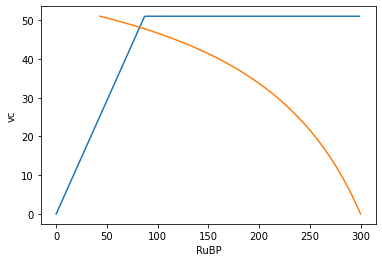

In [7]:
#plotting v vs Rt
vcr = []
for i in range(300):
    vcr.append(vcRt(i))
plt.plot(range(300), vcr)
Rt = []
for v in vcr:
    Rt.append(Rtvc(v))
plt.plot(Rt, vcr)
plt.xlabel('RuBP')
plt.ylabel('vc')
plt.show()

In [8]:
#net assimilation rate
def Assim(vc, rho = .45, Rd = 1.1, C = 230, O = 210, lkc = lkc, lko = lko, bkc = bkc, bko = bko):
    phi = (lko/lkc)*(O/bko)/(C/bkc)
    A = rho*(1-.5*phi)*vc - Rd
    return A

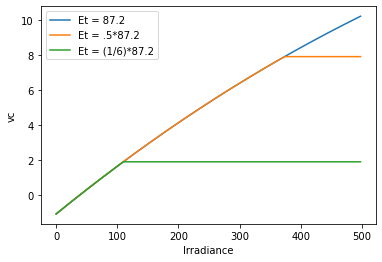

In [10]:
#plotting vc vs irradiance at three different enzyme concentrations
sixg = []
threeg = []
oneg = []
for i in range(1,500):
    sixg.append(Assim(vcmodel(I=i)))
    threeg.append(Assim(vcmodel(Et = Et/2,I=i)))
    oneg.append(Assim(vcmodel(Et = Et/6, I=i)))
plt.plot(range(499), sixg, label = 'Et = 87.2')
plt.plot(range(499), threeg, label = 'Et = .5*87.2')
plt.plot(range(499), oneg, label = 'Et = (1/6)*87.2')
plt.xlabel('Irradiance')
plt.ylabel('vc')
plt.legend()
plt.show()
